#### ML : Neural Network

พัชรพล อ่วมโอฬาร 6210422018

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import floor, ceil
from pylab import rcParams
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [3]:
import seaborn as sns
sns.set(style="ticks")

In [4]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [5]:
def PCA_Converter(data):
    df_wine_std = StandardScaler().fit_transform(data)
    pca = PCA(n_components=2)
    pca_fit = pca.fit_transform(df_wine_std)
    pca_join = pd.DataFrame(data=pca_fit, columns=['PCA1','PCA2'])
    return pca_join

In [6]:
def convert_stdZ(data, headers):
    df_std = StandardScaler().fit_transform(data)
    df_ret_std = pd.DataFrame(df_std, columns=headers)
    return df_ret_std

In [7]:
def plot_value_array(prediction, ytest, i):
    t_label = ytest.iloc[i]
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks(np.arange(0, 1, step=0.2))
    thisplot = plt.bar(range(4), prediction[i], color="#777777")
    plt.ylim([0, 1]) # Probability plot 0-1
    predicted_label = np.argmax(prediction[i])
    thisplot[predicted_label].set_color('red')
    thisplot[t_label].set_color('blue')
    plt.xlabel('CLASS')
    plt.ylabel('Probability')

In [8]:
# IMPORT FROM LOCAL FILE (Downloaded form webSite)
pathStr = 'source'
filename = pathStr+'\wine.data'
col_name = ['CLASS','ALC','MLA','ASH','AOA','MAG','PHE','FLA','NFL','PRO','COL','HUE','ODW','PRL']
df_wine = pd.read_csv(filename, sep=',', lineterminator='\n', header=None, names=col_name)

In [9]:
df_wine.head(5)

,CLASS,ALC,MLA,ASH,AOA,MAG,PHE,FLA,NFL,PRO,COL,HUE,ODW,PRL
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


The attributes are (dontated by Riccardo Leardi, riclea@anchem.unige.it )<br>
<ol>
    <li>ALC = Alcohol</li>
    <li>MLA = Malic acid</li>
    <li>ASH	= Ash</li>
    <li>AOA = Alcalinity of ash</li>
    <li>MAG = Magnesium</li>
    <li>PHE = Total phenols</li>
    <li>FLA = Flavanoids</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>PRO = Proanthocyanins</li>
    <li>COL = Color intensity</li>
    <li>HUE = Hue</li>
    <li>ODW = OD280/OD315 of diluted wines</li>
    <li>PRL = Proline</li>
</ol>

ทำ Correlation matrix

In [ ]:
df_corr = pd.DataFrame(df_wine.corr())

In [ ]:
plt.figure(figsize=(8,8))
plt.matshow(df_corr,fignum=1)
plt.xticks(range(len(df_corr.columns)), labels=df_corr.columns, rotation='vertical')
plt.yticks(range(len(df_corr.columns)), labels=df_corr.columns)

plt.imshow(df_corr, cmap=plt.cm.get_cmap('YlGnBu', 360))
plt.colorbar()
plt.clim(-1, 1);
plt.show()

In [ ]:
corr_cal = df_corr.iloc[0]

คัดเลือก Feature ที่เป็นบวกกับ CLASS

In [ ]:
corr_cal

In [ ]:
df_wine = df_wine[['CLASS','MLA','AOA','NFL','COL']]

#### Data preprocessing

In [10]:
target = df_wine['CLASS']
data = df_wine.drop('CLASS', axis=1)

In [11]:
cols = list(data.columns)

In [12]:
# ถ้าต้องการ PCA ให้เหลือ 2Dim(fix) ให้ activate comment และข้าม Standardize the data (built in แล้ว))
data = PCA_Converter(data)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2, random_state=42)

In [14]:
X_Result = X_test.copy()

Standardize the data

In [ ]:
X_train = convert_stdZ(X_train, cols)
X_test = convert_stdZ(X_test, cols)

#### Build model

Hyperparameter test

In [15]:
params = {
    'epochs':[10,20,50],
    'optimizer':['adam','rmsprop'],
    'kernel':['random_uniform','glorot_uniform'],
    'batch_size': [5, 10, 20]
}

In [19]:
def build_classifier(optimizer, kernel):
    model = Sequential()
    # model.add(Dense(4, input_dim=2, kernel_initializer=kernel, activation='relu')) # กรณี PCA
    model.add(Dense(4, input_dim=2, kernel_initializer=kernel, activation='relu'))
    model.add(Dense(8, kernel_initializer=kernel, activation='relu'))
    model.add(Dense(3, kernel_initializer=kernel, activation='sigmoid'))
    model.compile(optimizer=optimizer,
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics =['accuracy'])
    return model

In [20]:
clf_model = KerasClassifier(build_classifier)

In [21]:
grid_search = GridSearchCV(estimator=clf_model, param_grid=params, n_jobs=1, cv=5)
grid_search = grid_search.fit(X_train, y_train)

Train on 113 samples
Epoch 1/10
113/113 [==============================] - 1s 5ms/sample - loss: 1.0985 - accuracy: 0.3982
Epoch 2/10
113/113 [==============================] - 0s 353us/sample - loss: 1.0979 - accuracy: 0.3982
Epoch 3/10
113/113 [==============================] - 0s 353us/sample - loss: 1.0967 - accuracy: 0.3982
Epoch 4/10
113/113 [==============================] - 0s 327us/sample - loss: 1.0942 - accuracy: 0.4867
Epoch 5/10
113/113 [==============================] - 0s 327us/sample - loss: 1.0897 - accuracy: 0.6372
Epoch 6/10
113/113 [==============================] - 0s 344us/sample - loss: 1.0823 - accuracy: 0.6726
Epoch 7/10
113/113 [==============================] - 0s 344us/sample - loss: 1.0711 - accuracy: 0.6903
Epoch 8/10
113/113 [==============================] - 0s 344us/sample - loss: 1.0559 - accuracy: 0.6814
Epoch 9/10
113/113 [==============================] - 0s 415us/sample - loss: 1.0363 - accuracy: 0.6726
Epoch 10/10
29/29 [==========================

114/114 [==============================] - 0s 332us/sample - loss: 1.0976 - accuracy: 0.5614
Epoch 3/10
114/114 [==============================] - 0s 411us/sample - loss: 1.0961 - accuracy: 0.6491
Epoch 4/10
114/114 [==============================] - 0s 402us/sample - loss: 1.0939 - accuracy: 0.6491
Epoch 5/10
114/114 [==============================] - 0s 332us/sample - loss: 1.0908 - accuracy: 0.6140
Epoch 6/10
114/114 [==============================] - 0s 324us/sample - loss: 1.0863 - accuracy: 0.5877
Epoch 7/10
114/114 [==============================] - 0s 315us/sample - loss: 1.0799 - accuracy: 0.5263
Epoch 8/10
114/114 [==============================] - 0s 324us/sample - loss: 1.0721 - accuracy: 0.4474
Epoch 9/10
114/114 [==============================] - 0s 376us/sample - loss: 1.0634 - accuracy: 0.4211
Epoch 10/10
28/28 [==============================] - 0s 5ms/sample - loss: 1.0453 - accuracy: 0.4286
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 1s 

114/114 [==============================] - 0s 370us/sample - loss: 1.0168 - accuracy: 0.7018
Epoch 4/10
114/114 [==============================] - 0s 367us/sample - loss: 0.9993 - accuracy: 0.7105
Epoch 5/10
114/114 [==============================] - 0s 297us/sample - loss: 0.9821 - accuracy: 0.7456
Epoch 6/10
114/114 [==============================] - 0s 376us/sample - loss: 0.9636 - accuracy: 0.7807
Epoch 7/10
114/114 [==============================] - 0s 350us/sample - loss: 0.9454 - accuracy: 0.7982
Epoch 8/10
114/114 [==============================] - 0s 394us/sample - loss: 0.9270 - accuracy: 0.8246
Epoch 9/10
114/114 [==============================] - 0s 446us/sample - loss: 0.9078 - accuracy: 0.9123
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 0.8632 - accuracy: 0.9643
Train on 113 samples
Epoch 1/10
113/113 [==============================] - 1s 5ms/sample - loss: 1.0231 - accuracy: 0.3805
Epoch 2/10
113/113 [==============================] - 0s 37

113/113 [==============================] - 0s 380us/sample - loss: 0.8804 - accuracy: 0.6549
Epoch 16/20
113/113 [==============================] - 0s 371us/sample - loss: 0.8655 - accuracy: 0.6549
Epoch 17/20
113/113 [==============================] - 0s 406us/sample - loss: 0.8520 - accuracy: 0.6549
Epoch 18/20
113/113 [==============================] - 0s 380us/sample - loss: 0.8408 - accuracy: 0.6549
Epoch 19/20
113/113 [==============================] - 0s 315us/sample - loss: 0.8314 - accuracy: 0.6549
Epoch 20/20
29/29 [==============================] - 0s 5ms/sample - loss: 0.7845 - accuracy: 0.7241
Train on 113 samples
Epoch 1/20
113/113 [==============================] - 0s 4ms/sample - loss: 1.0985 - accuracy: 0.2743
Epoch 2/20
113/113 [==============================] - 0s 453us/sample - loss: 1.0979 - accuracy: 0.4071
Epoch 3/20
113/113 [==============================] - 0s 388us/sample - loss: 1.0964 - accuracy: 0.5221
Epoch 4/20
113/113 [==============================] - 0

114/114 [==============================] - 0s 359us/sample - loss: 1.0299 - accuracy: 0.9474
Epoch 10/20
114/114 [==============================] - 0s 306us/sample - loss: 1.0053 - accuracy: 0.9561
Epoch 11/20
114/114 [==============================] - 0s 367us/sample - loss: 0.9793 - accuracy: 0.9474
Epoch 12/20
114/114 [==============================] - 0s 341us/sample - loss: 0.9537 - accuracy: 0.8947
Epoch 13/20
114/114 [==============================] - 0s 376us/sample - loss: 0.9289 - accuracy: 0.8860
Epoch 14/20
114/114 [==============================] - 0s 367us/sample - loss: 0.9045 - accuracy: 0.9123
Epoch 15/20
114/114 [==============================] - 0s 350us/sample - loss: 0.8805 - accuracy: 0.9298
Epoch 16/20
114/114 [==============================] - 0s 394us/sample - loss: 0.8582 - accuracy: 0.9211
Epoch 17/20
114/114 [==============================] - ETA: 0s - loss: 0.8989 - accuracy: 0.80 - 0s 369us/sample - loss: 0.8368 - accuracy: 0.9474
Epoch 18/20
114/114 [====

Epoch 3/20
114/114 [==============================] - 0s 341us/sample - loss: 1.0967 - accuracy: 0.4123
Epoch 4/20
114/114 [==============================] - 0s 420us/sample - loss: 1.0949 - accuracy: 0.4123
Epoch 5/20
114/114 [==============================] - 0s 397us/sample - loss: 1.0924 - accuracy: 0.4123
Epoch 6/20
114/114 [==============================] - 0s 945us/sample - loss: 1.0889 - accuracy: 0.5614
Epoch 7/20
114/114 [==============================] - 0s 411us/sample - loss: 1.0845 - accuracy: 0.6228
Epoch 8/20
114/114 [==============================] - 0s 525us/sample - loss: 1.0789 - accuracy: 0.6491
Epoch 9/20
114/114 [==============================] - 0s 2ms/sample - loss: 1.0721 - accuracy: 0.6667
Epoch 10/20
114/114 [==============================] - 0s 639us/sample - loss: 1.0639 - accuracy: 0.6667
Epoch 11/20
114/114 [==============================] - 0s 892us/sample - loss: 1.0538 - accuracy: 0.6667
Epoch 12/20
114/114 [==============================] - 0s 551us/

Epoch 18/20
113/113 [==============================] - 0s 874us/sample - loss: 0.8577 - accuracy: 0.9292
Epoch 19/20
113/113 [==============================] - 0s 574us/sample - loss: 0.8476 - accuracy: 0.9204
Epoch 20/20
29/29 [==============================] - 0s 14ms/sample - loss: 0.8726 - accuracy: 0.9655
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 1s 10ms/sample - loss: 1.0955 - accuracy: 0.4386
Epoch 2/20
114/114 [==============================] - 0s 429us/sample - loss: 1.0734 - accuracy: 0.5877
Epoch 3/20
114/114 [==============================] - 0s 595us/sample - loss: 1.0518 - accuracy: 0.5877
Epoch 4/20
114/114 [==============================] - 0s 429us/sample - loss: 1.0297 - accuracy: 0.5877
Epoch 5/20
114/114 [==============================] - 0s 516us/sample - loss: 1.0092 - accuracy: 0.5877
Epoch 6/20
114/114 [==============================] - 0s 569us/sample - loss: 0.9889 - accuracy: 0.5965
Epoch 7/20
114/114 [========================

113/113 [==============================] - 0s 289us/sample - loss: 1.0294 - accuracy: 0.6814
Epoch 12/20
113/113 [==============================] - 0s 274us/sample - loss: 1.0198 - accuracy: 0.7168
Epoch 13/20
113/113 [==============================] - 0s 293us/sample - loss: 1.0103 - accuracy: 0.7788
Epoch 14/20
113/113 [==============================] - 0s 293us/sample - loss: 1.0009 - accuracy: 0.8761
Epoch 15/20
113/113 [==============================] - 0s 279us/sample - loss: 0.9913 - accuracy: 0.9469
Epoch 16/20
113/113 [==============================] - 0s 389us/sample - loss: 0.9813 - accuracy: 0.9469
Epoch 17/20
113/113 [==============================] - 0s 300us/sample - loss: 0.9711 - accuracy: 0.9469
Epoch 18/20
113/113 [==============================] - 0s 384us/sample - loss: 0.9609 - accuracy: 0.9469
Epoch 19/20
113/113 [==============================] - 0s 373us/sample - loss: 0.9502 - accuracy: 0.9469
Epoch 20/20
29/29 [==============================] - 0s 5ms/sample 

114/114 [==============================] - 0s 516us/sample - loss: 0.9625 - accuracy: 0.6667
Epoch 5/20
114/114 [==============================] - 0s 566us/sample - loss: 0.9445 - accuracy: 0.6667
Epoch 6/20
114/114 [==============================] - 0s 356us/sample - loss: 0.9277 - accuracy: 0.6667
Epoch 7/20
114/114 [==============================] - 0s 329us/sample - loss: 0.9119 - accuracy: 0.6667
Epoch 8/20
114/114 [==============================] - 0s 272us/sample - loss: 0.8967 - accuracy: 0.6754
Epoch 9/20
114/114 [==============================] - 0s 315us/sample - loss: 0.8823 - accuracy: 0.6754
Epoch 10/20
114/114 [==============================] - 0s 280us/sample - loss: 0.8683 - accuracy: 0.6842
Epoch 11/20
114/114 [==============================] - 0s 297us/sample - loss: 0.8553 - accuracy: 0.6930
Epoch 12/20
114/114 [==============================] - 0s 306us/sample - loss: 0.8434 - accuracy: 0.6930
Epoch 13/20
114/114 [==============================] - 0s 324us/sample -

113/113 [==============================] - 0s 247us/sample - loss: 1.0603 - accuracy: 0.3982
Epoch 10/50
113/113 [==============================] - 0s 247us/sample - loss: 1.0423 - accuracy: 0.3982
Epoch 11/50
113/113 [==============================] - 0s 547us/sample - loss: 1.0219 - accuracy: 0.3982
Epoch 12/50
113/113 [==============================] - 0s 388us/sample - loss: 1.0023 - accuracy: 0.3982
Epoch 13/50
113/113 [==============================] - 0s 344us/sample - loss: 0.9850 - accuracy: 0.3982
Epoch 14/50
113/113 [==============================] - 0s 344us/sample - loss: 0.9709 - accuracy: 0.3982
Epoch 15/50
113/113 [==============================] - 0s 335us/sample - loss: 0.9586 - accuracy: 0.3982
Epoch 16/50
113/113 [==============================] - 0s 163us/sample - loss: 0.9483 - accuracy: 0.3982
Epoch 17/50
113/113 [==============================] - 0s 278us/sample - loss: 0.9407 - accuracy: 0.6018
Epoch 18/50
113/113 [==============================] - 0s 154us/sam

114/114 [==============================] - 0s 308us/sample - loss: 0.7742 - accuracy: 0.6842
Epoch 37/50
114/114 [==============================] - 0s 303us/sample - loss: 0.7706 - accuracy: 0.6930
Epoch 38/50
114/114 [==============================] - 0s 289us/sample - loss: 0.7673 - accuracy: 0.7105
Epoch 39/50
114/114 [==============================] - 0s 336us/sample - loss: 0.7642 - accuracy: 0.7193
Epoch 40/50
114/114 [==============================] - 0s 361us/sample - loss: 0.7609 - accuracy: 0.7544
Epoch 41/50
114/114 [==============================] - 0s 137us/sample - loss: 0.7577 - accuracy: 0.7719
Epoch 42/50
114/114 [==============================] - 0s 177us/sample - loss: 0.7544 - accuracy: 0.8158
Epoch 43/50
114/114 [==============================] - 0s 174us/sample - loss: 0.7515 - accuracy: 0.8421
Epoch 44/50
114/114 [==============================] - 0s 177us/sample - loss: 0.7481 - accuracy: 0.8684
Epoch 45/50
114/114 [==============================] - 0s 275us/sam

114/114 [==============================] - 0s 262us/sample - loss: 0.9653 - accuracy: 0.6316
Epoch 13/50
114/114 [==============================] - 0s 315us/sample - loss: 0.9416 - accuracy: 0.6491
Epoch 14/50
114/114 [==============================] - 0s 254us/sample - loss: 0.9213 - accuracy: 0.6491
Epoch 15/50
114/114 [==============================] - 0s 306us/sample - loss: 0.9037 - accuracy: 0.6579
Epoch 16/50
114/114 [==============================] - 0s 354us/sample - loss: 0.8879 - accuracy: 0.6667
Epoch 17/50
114/114 [==============================] - 0s 367us/sample - loss: 0.8750 - accuracy: 0.6667
Epoch 18/50
114/114 [==============================] - 0s 542us/sample - loss: 0.8641 - accuracy: 0.6667
Epoch 19/50
114/114 [==============================] - 0s 189us/sample - loss: 0.8547 - accuracy: 0.6667
Epoch 20/50
114/114 [==============================] - 0s 417us/sample - loss: 0.8467 - accuracy: 0.6754
Epoch 21/50
114/114 [==============================] - 0s 394us/sam

113/113 [==============================] - 0s 106us/sample - loss: 0.7411 - accuracy: 0.9381
Epoch 40/50
113/113 [==============================] - 0s 389us/sample - loss: 0.7373 - accuracy: 0.9381
Epoch 41/50
113/113 [==============================] - 0s 227us/sample - loss: 0.7341 - accuracy: 0.9381
Epoch 42/50
113/113 [==============================] - 0s 250us/sample - loss: 0.7309 - accuracy: 0.9469
Epoch 43/50
113/113 [==============================] - 0s 251us/sample - loss: 0.7282 - accuracy: 0.9469
Epoch 44/50
113/113 [==============================] - 0s 335us/sample - loss: 0.7255 - accuracy: 0.9469
Epoch 45/50
113/113 [==============================] - 0s 415us/sample - loss: 0.7228 - accuracy: 0.9469
Epoch 46/50
113/113 [==============================] - 0s 419us/sample - loss: 0.7203 - accuracy: 0.9469
Epoch 47/50
113/113 [==============================] - 0s 424us/sample - loss: 0.7178 - accuracy: 0.9469
Epoch 48/50
113/113 [==============================] - 0s 414us/sam

114/114 [==============================] - 0s 333us/sample - loss: 1.0049 - accuracy: 0.8421
Epoch 16/50
114/114 [==============================] - 0s 269us/sample - loss: 0.9919 - accuracy: 0.7982
Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9787 - accuracy: 0.7982
Epoch 18/50
114/114 [==============================] - 0s 548us/sample - loss: 0.9654 - accuracy: 0.7895
Epoch 19/50
114/114 [==============================] - 0s 306us/sample - loss: 0.9528 - accuracy: 0.7807
Epoch 20/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9404 - accuracy: 0.7719
Epoch 21/50
114/114 [==============================] - 0s 216us/sample - loss: 0.9283 - accuracy: 0.7544
Epoch 22/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9171 - accuracy: 0.7544
Epoch 23/50
114/114 [==============================] - 0s 274us/sample - loss: 0.9064 - accuracy: 0.7544
Epoch 24/50
114/114 [==============================] - 0s 137us/sam

114/114 [==============================] - 0s 412us/sample - loss: 0.8196 - accuracy: 0.6667
Epoch 42/50
114/114 [==============================] - 0s 575us/sample - loss: 0.8121 - accuracy: 0.6754
Epoch 43/50
114/114 [==============================] - 0s 365us/sample - loss: 0.8042 - accuracy: 0.6842
Epoch 44/50
114/114 [==============================] - 0s 306us/sample - loss: 0.7971 - accuracy: 0.6842
Epoch 45/50
114/114 [==============================] - 0s 271us/sample - loss: 0.7901 - accuracy: 0.6842
Epoch 46/50
114/114 [==============================] - 0s 236us/sample - loss: 0.7838 - accuracy: 0.6842
Epoch 47/50
114/114 [==============================] - 0s 271us/sample - loss: 0.7775 - accuracy: 0.6842
Epoch 48/50
114/114 [==============================] - 0s 297us/sample - loss: 0.7713 - accuracy: 0.6930
Epoch 49/50
114/114 [==============================] - 0s 324us/sample - loss: 0.7654 - accuracy: 0.6930
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample 

113/113 [==============================] - 0s 318us/sample - loss: 0.8616 - accuracy: 0.9469
Epoch 18/50
113/113 [==============================] - 0s 256us/sample - loss: 0.8472 - accuracy: 0.9558
Epoch 19/50
113/113 [==============================] - 0s 256us/sample - loss: 0.8335 - accuracy: 0.9558
Epoch 20/50
113/113 [==============================] - 0s 238us/sample - loss: 0.8204 - accuracy: 0.9558
Epoch 21/50
113/113 [==============================] - 0s 238us/sample - loss: 0.8075 - accuracy: 0.9646
Epoch 22/50
113/113 [==============================] - 0s 238us/sample - loss: 0.7951 - accuracy: 0.9646
Epoch 23/50
113/113 [==============================] - 0s 229us/sample - loss: 0.7834 - accuracy: 0.9646
Epoch 24/50
113/113 [==============================] - 0s 274us/sample - loss: 0.7725 - accuracy: 0.9646
Epoch 25/50
113/113 [==============================] - 0s 247us/sample - loss: 0.7621 - accuracy: 0.9646
Epoch 26/50
113/113 [==============================] - 0s 274us/sam

113/113 [==============================] - 0s 406us/sample - loss: 0.6074 - accuracy: 0.9558
Epoch 45/50
113/113 [==============================] - 0s 424us/sample - loss: 0.6064 - accuracy: 0.9558
Epoch 46/50
113/113 [==============================] - 0s 450us/sample - loss: 0.6057 - accuracy: 0.9558
Epoch 47/50
113/113 [==============================] - 0s 459us/sample - loss: 0.6050 - accuracy: 0.9558
Epoch 48/50
113/113 [==============================] - 0s 397us/sample - loss: 0.6042 - accuracy: 0.9558
Epoch 49/50
113/113 [==============================] - 0s 459us/sample - loss: 0.6035 - accuracy: 0.9558
Epoch 50/50
29/29 [==============================] - 0s 8ms/sample - loss: 0.6215 - accuracy: 0.9655
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 1s 6ms/sample - loss: 1.0985 - accuracy: 0.4035
Epoch 2/50
114/114 [==============================] - 0s 429us/sample - loss: 1.0864 - accuracy: 0.4035
Epoch 3/50
114/114 [==============================] - 

114/114 [==============================] - 0s 197us/sample - loss: 0.8346 - accuracy: 0.9474
Epoch 20/50
114/114 [==============================] - 0s 190us/sample - loss: 0.8158 - accuracy: 0.9474
Epoch 21/50
114/114 [==============================] - 0s 274us/sample - loss: 0.7976 - accuracy: 0.9474
Epoch 22/50
114/114 [==============================] - 0s 137us/sample - loss: 0.7799 - accuracy: 0.9474
Epoch 23/50
114/114 [==============================] - 0s 274us/sample - loss: 0.7628 - accuracy: 0.9474
Epoch 24/50
114/114 [==============================] - 0s 318us/sample - loss: 0.7460 - accuracy: 0.9561
Epoch 25/50
114/114 [==============================] - 0s 376us/sample - loss: 0.7302 - accuracy: 0.9649
Epoch 26/50
114/114 [==============================] - 0s 402us/sample - loss: 0.7148 - accuracy: 0.9649
Epoch 27/50
114/114 [==============================] - 0s 315us/sample - loss: 0.7010 - accuracy: 0.9649
Epoch 28/50
114/114 [==============================] - 0s 359us/sam

114/114 [==============================] - 0s 226us/sample - loss: 0.6056 - accuracy: 0.9649
Epoch 47/50
114/114 [==============================] - 0s 291us/sample - loss: 0.6047 - accuracy: 0.9649
Epoch 48/50
114/114 [==============================] - 0s 219us/sample - loss: 0.6036 - accuracy: 0.9649
Epoch 49/50
114/114 [==============================] - 0s 236us/sample - loss: 0.6029 - accuracy: 0.9649
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample - loss: 0.6093 - accuracy: 0.9643
Train on 113 samples
Epoch 1/50
113/113 [==============================] - 1s 5ms/sample - loss: 1.1367 - accuracy: 0.2478
Epoch 2/50
113/113 [==============================] - 0s 265us/sample - loss: 1.1193 - accuracy: 0.2301
Epoch 3/50
113/113 [==============================] - 0s 256us/sample - loss: 1.1041 - accuracy: 0.3363
Epoch 4/50
113/113 [==============================] - 0s 256us/sample - loss: 1.0888 - accuracy: 0.5398
Epoch 5/50
113/113 [==============================] - 0s

113/113 [==============================] - 0s 406us/sample - loss: 0.8394 - accuracy: 0.6549
Epoch 23/50
113/113 [==============================] - 0s 300us/sample - loss: 0.8339 - accuracy: 0.6549
Epoch 24/50
113/113 [==============================] - 0s 300us/sample - loss: 0.8284 - accuracy: 0.6726
Epoch 25/50
113/113 [==============================] - 0s 274us/sample - loss: 0.8234 - accuracy: 0.6726
Epoch 26/50
113/113 [==============================] - 0s 274us/sample - loss: 0.8183 - accuracy: 0.6637
Epoch 27/50
113/113 [==============================] - 0s 300us/sample - loss: 0.8133 - accuracy: 0.6637
Epoch 28/50
113/113 [==============================] - 0s 274us/sample - loss: 0.8081 - accuracy: 0.6637
Epoch 29/50
113/113 [==============================] - 0s 583us/sample - loss: 0.8034 - accuracy: 0.6637
Epoch 30/50
113/113 [==============================] - 0s 362us/sample - loss: 0.7990 - accuracy: 0.6637
Epoch 31/50
113/113 [==============================] - 0s 450us/sam

114/114 [==============================] - 0s 176us/sample - loss: 0.6251 - accuracy: 0.9561
Epoch 50/50
28/28 [==============================] - 0s 7ms/sample - loss: 0.6096 - accuracy: 0.9643
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 1s 4ms/sample - loss: 1.0959 - accuracy: 0.3509
Epoch 2/50
114/114 [==============================] - 0s 236us/sample - loss: 1.0803 - accuracy: 0.4912
Epoch 3/50
114/114 [==============================] - 0s 251us/sample - loss: 1.0639 - accuracy: 0.5877
Epoch 4/50
114/114 [==============================] - 0s 207us/sample - loss: 1.0470 - accuracy: 0.6228
Epoch 5/50
114/114 [==============================] - 0s 262us/sample - loss: 1.0317 - accuracy: 0.6228
Epoch 6/50
114/114 [==============================] - 0s 256us/sample - loss: 1.0177 - accuracy: 0.6754
Epoch 7/50
114/114 [==============================] - 0s 289us/sample - loss: 1.0060 - accuracy: 0.6842
Epoch 8/50
114/114 [==============================] - 0s 37

114/114 [==============================] - 0s 267us/sample - loss: 0.7536 - accuracy: 0.9035
Epoch 25/50
114/114 [==============================] - 0s 145us/sample - loss: 0.7475 - accuracy: 0.9035
Epoch 26/50
114/114 [==============================] - 0s 179us/sample - loss: 0.7419 - accuracy: 0.9035
Epoch 27/50
114/114 [==============================] - 0s 256us/sample - loss: 0.7370 - accuracy: 0.9123
Epoch 28/50
114/114 [==============================] - 0s 182us/sample - loss: 0.7320 - accuracy: 0.9123
Epoch 29/50
114/114 [==============================] - 0s 263us/sample - loss: 0.7270 - accuracy: 0.9123
Epoch 30/50
114/114 [==============================] - 0s 176us/sample - loss: 0.7223 - accuracy: 0.9298
Epoch 31/50
114/114 [==============================] - 0s 255us/sample - loss: 0.7177 - accuracy: 0.9386
Epoch 32/50
114/114 [==============================] - 0s 272us/sample - loss: 0.7131 - accuracy: 0.9386
Epoch 33/50
114/114 [==============================] - 0s 175us/sam

114/114 [==============================] - 0s 149us/sample - loss: 1.0929 - accuracy: 0.6667
Epoch 8/10
114/114 [==============================] - 0s 149us/sample - loss: 1.0902 - accuracy: 0.6754
Epoch 9/10
114/114 [==============================] - 0s 157us/sample - loss: 1.0864 - accuracy: 0.6754
Epoch 10/10
28/28 [==============================] - 0s 6ms/sample - loss: 1.0781 - accuracy: 0.6786
Train on 113 samples
Epoch 1/10
113/113 [==============================] - 1s 7ms/sample - loss: 1.0984 - accuracy: 0.3805
Epoch 2/10
113/113 [==============================] - 0s 28us/sample - loss: 1.0981 - accuracy: 0.3982
Epoch 3/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0978 - accuracy: 0.3982
Epoch 4/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0974 - accuracy: 0.3982
Epoch 5/10
113/113 [==============================] - 0s 138us/sample - loss: 1.0970 - accuracy: 0.3982
Epoch 6/10
113/113 [==============================] - 0s 222

113/113 [==============================] - 0s 150us/sample - loss: 0.9383 - accuracy: 0.7788
Epoch 9/10
113/113 [==============================] - 0s 132us/sample - loss: 0.9266 - accuracy: 0.8319
Epoch 10/10
29/29 [==============================] - 0s 3ms/sample - loss: 0.9317 - accuracy: 0.8621
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 3ms/sample - loss: 1.0981 - accuracy: 0.4737
Epoch 2/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0901 - accuracy: 0.4737
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0817 - accuracy: 0.4825
Epoch 4/10
114/114 [==============================] - 0s 103us/sample - loss: 1.0729 - accuracy: 0.4825
Epoch 5/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0632 - accuracy: 0.4825
Epoch 6/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0535 - accuracy: 0.4912
Epoch 7/10
114/114 [==============================] - 0s 13

114/114 [==============================] - 0s 140us/sample - loss: 0.9735 - accuracy: 0.7018
Epoch 10/10
28/28 [==============================] - 0s 4ms/sample - loss: 0.9669 - accuracy: 0.6429
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 4ms/sample - loss: 1.0756 - accuracy: 0.4912
Epoch 2/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0601 - accuracy: 0.5526
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0486 - accuracy: 0.5702
Epoch 4/10
114/114 [==============================] - 0s 57us/sample - loss: 1.0382 - accuracy: 0.8333
Epoch 5/10
114/114 [==============================] - 0s 251us/sample - loss: 1.0287 - accuracy: 0.8421
Epoch 6/10
114/114 [==============================] - 0s 140us/sample - loss: 1.0208 - accuracy: 0.8421
Epoch 7/10
114/114 [==============================] - 0s 76us/sample - loss: 1.0147 - accuracy: 0.8421
Epoch 8/10
114/114 [==============================] - 0s 137u

114/114 [==============================] - 0s 41us/sample - loss: 1.0981 - accuracy: 0.4123
Epoch 3/20
114/114 [==============================] - 0s 136us/sample - loss: 1.0977 - accuracy: 0.4123
Epoch 4/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0970 - accuracy: 0.4123
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0960 - accuracy: 0.4123
Epoch 6/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0944 - accuracy: 0.4123
Epoch 7/20
114/114 [==============================] - 0s 220us/sample - loss: 1.0923 - accuracy: 0.4123
Epoch 8/20
114/114 [==============================] - 0s 131us/sample - loss: 1.0891 - accuracy: 0.4825
Epoch 9/20
114/114 [==============================] - 0s 100us/sample - loss: 1.0849 - accuracy: 0.6930
Epoch 10/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0795 - accuracy: 0.8596
Epoch 11/20
114/114 [==============================] - 0s 137us/sample - lo

113/113 [==============================] - 0s 196us/sample - loss: 1.0679 - accuracy: 0.9115
Epoch 18/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0637 - accuracy: 0.9115
Epoch 19/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0592 - accuracy: 0.9115
Epoch 20/20
29/29 [==============================] - 0s 4ms/sample - loss: 1.0588 - accuracy: 0.8276
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 1s 6ms/sample - loss: 1.0986 - accuracy: 0.2807
Epoch 2/20
114/114 [==============================] - 0s 149us/sample - loss: 1.0983 - accuracy: 0.4035
Epoch 3/20
114/114 [==============================] - 0s 149us/sample - loss: 1.0978 - accuracy: 0.4035
Epoch 4/20
114/114 [==============================] - 0s 77us/sample - loss: 1.0972 - accuracy: 0.4035
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0965 - accuracy: 0.4035
Epoch 6/20
114/114 [==============================] - 0s 1

113/113 [==============================] - 0s 138us/sample - loss: 0.9990 - accuracy: 0.7522
Epoch 12/20
113/113 [==============================] - 0s 138us/sample - loss: 0.9851 - accuracy: 0.7876
Epoch 13/20
113/113 [==============================] - 0s 138us/sample - loss: 0.9711 - accuracy: 0.8142
Epoch 14/20
113/113 [==============================] - 0s 138us/sample - loss: 0.9562 - accuracy: 0.8496
Epoch 15/20
113/113 [==============================] - 0s 280us/sample - loss: 0.9412 - accuracy: 0.8850
Epoch 16/20
113/113 [==============================] - 0s 132us/sample - loss: 0.9258 - accuracy: 0.9204
Epoch 17/20
113/113 [==============================] - 0s 132us/sample - loss: 0.9104 - accuracy: 0.9381
Epoch 18/20
113/113 [==============================] - 0s 124us/sample - loss: 0.8958 - accuracy: 0.9558
Epoch 19/20
113/113 [==============================] - 0s 19us/sample - loss: 0.8809 - accuracy: 0.9558
Epoch 20/20
29/29 [==============================] - 0s 6ms/sample -

114/114 [==============================] - 0s 137us/sample - loss: 1.0290 - accuracy: 0.3158
Epoch 6/20
114/114 [==============================] - 0s 185us/sample - loss: 1.0223 - accuracy: 0.3158
Epoch 7/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0153 - accuracy: 0.3333
Epoch 8/20
114/114 [==============================] - 0s 123us/sample - loss: 1.0089 - accuracy: 0.3509
Epoch 9/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0019 - accuracy: 0.4912
Epoch 10/20
114/114 [==============================] - 0s 0s/sample - loss: 0.9949 - accuracy: 0.6667
Epoch 11/20
114/114 [==============================] - 0s 0s/sample - loss: 0.9877 - accuracy: 0.6667
Epoch 12/20
114/114 [==============================] - 0s 137us/sample - loss: 0.9807 - accuracy: 0.6842
Epoch 13/20
114/114 [==============================] - 0s 137us/sample - loss: 0.9736 - accuracy: 0.6754
Epoch 14/20
114/114 [==============================] - 0s 137us/sample - loss: 0

28/28 [==============================] - 0s 4ms/sample - loss: 0.8131 - accuracy: 0.9643
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 0s 4ms/sample - loss: 1.1220 - accuracy: 0.4123
Epoch 2/20
114/114 [==============================] - 0s 137us/sample - loss: 1.1045 - accuracy: 0.4123
Epoch 3/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0887 - accuracy: 0.4123
Epoch 4/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0730 - accuracy: 0.4123
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0573 - accuracy: 0.4123
Epoch 6/20
114/114 [==============================] - 0s 194us/sample - loss: 1.0418 - accuracy: 0.4211
Epoch 7/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0264 - accuracy: 0.5526
Epoch 8/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0109 - accuracy: 0.6053
Epoch 9/20
114/114 [==============================] - 0s 137

113/113 [==============================] - 0s 138us/sample - loss: 0.7923 - accuracy: 0.6637
Epoch 36/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7883 - accuracy: 0.6637
Epoch 37/50
113/113 [==============================] - 0s 221us/sample - loss: 0.7847 - accuracy: 0.6637
Epoch 38/50
113/113 [==============================] - 0s 159us/sample - loss: 0.7808 - accuracy: 0.6637
Epoch 39/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7770 - accuracy: 0.6637
Epoch 40/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7735 - accuracy: 0.6637
Epoch 41/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7700 - accuracy: 0.6637
Epoch 42/50
113/113 [==============================] - 0s 138us/sample - loss: 0.7663 - accuracy: 0.6637
Epoch 43/50
113/113 [==============================] - 0s 189us/sample - loss: 0.7628 - accuracy: 0.6637
Epoch 44/50
113/113 [==============================] - 0s 139us/sam

114/114 [==============================] - 0s 137us/sample - loss: 1.0824 - accuracy: 0.5702
Epoch 11/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0762 - accuracy: 0.6404
Epoch 12/50
114/114 [==============================] - 0s 204us/sample - loss: 1.0682 - accuracy: 0.7807
Epoch 13/50
114/114 [==============================] - 0s 131us/sample - loss: 1.0584 - accuracy: 0.8684
Epoch 14/50
114/114 [==============================] - 0s 68us/sample - loss: 1.0456 - accuracy: 0.9123
Epoch 15/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0315 - accuracy: 0.8947
Epoch 16/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0146 - accuracy: 0.9035
Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9973 - accuracy: 0.9123
Epoch 18/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9785 - accuracy: 0.9035
Epoch 19/50
114/114 [==============================] - 0s 0s/sample 

114/114 [==============================] - 0s 155us/sample - loss: 0.8761 - accuracy: 0.6667
Epoch 37/50
114/114 [==============================] - 0s 164us/sample - loss: 0.8723 - accuracy: 0.6667
Epoch 38/50
114/114 [==============================] - 0s 146us/sample - loss: 0.8685 - accuracy: 0.6667
Epoch 39/50
114/114 [==============================] - 0s 156us/sample - loss: 0.8649 - accuracy: 0.6667
Epoch 40/50
114/114 [==============================] - 0s 197us/sample - loss: 0.8617 - accuracy: 0.6667
Epoch 41/50
114/114 [==============================] - 0s 149us/sample - loss: 0.8585 - accuracy: 0.6667
Epoch 42/50
114/114 [==============================] - 0s 149us/sample - loss: 0.8556 - accuracy: 0.6667
Epoch 43/50
114/114 [==============================] - 0s 149us/sample - loss: 0.8530 - accuracy: 0.6667
Epoch 44/50
114/114 [==============================] - 0s 192us/sample - loss: 0.8505 - accuracy: 0.6667
Epoch 45/50
114/114 [==============================] - 0s 219us/sam

113/113 [==============================] - 0s 138us/sample - loss: 1.0765 - accuracy: 0.5664
Epoch 13/50
113/113 [==============================] - 0s 196us/sample - loss: 1.0723 - accuracy: 0.6283
Epoch 14/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0676 - accuracy: 0.6726
Epoch 15/50
113/113 [==============================] - 0s 91us/sample - loss: 1.0624 - accuracy: 0.6903
Epoch 16/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0566 - accuracy: 0.7257
Epoch 17/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0504 - accuracy: 0.7434
Epoch 18/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0436 - accuracy: 0.7699
Epoch 19/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0365 - accuracy: 0.7876
Epoch 20/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0291 - accuracy: 0.8053
Epoch 21/50
113/113 [==============================] - 0s 138us/sample 

113/113 [==============================] - 0s 138us/sample - loss: 0.8681 - accuracy: 0.6991
Epoch 39/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8590 - accuracy: 0.6991
Epoch 40/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8503 - accuracy: 0.6991
Epoch 41/50
113/113 [==============================] - 0s 58us/sample - loss: 0.8417 - accuracy: 0.6991
Epoch 42/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8332 - accuracy: 0.6991
Epoch 43/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8254 - accuracy: 0.6991
Epoch 44/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8179 - accuracy: 0.6991
Epoch 45/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8106 - accuracy: 0.6991
Epoch 46/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8038 - accuracy: 0.6991
Epoch 47/50
113/113 [==============================] - 0s 196us/samp

114/114 [==============================] - 0s 137us/sample - loss: 1.0778 - accuracy: 0.6754
Epoch 14/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0742 - accuracy: 0.6667
Epoch 15/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0701 - accuracy: 0.6754
Epoch 16/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0655 - accuracy: 0.7544
Epoch 17/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0606 - accuracy: 0.7895
Epoch 18/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0551 - accuracy: 0.7982
Epoch 19/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0491 - accuracy: 0.8246
Epoch 20/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0427 - accuracy: 0.8421
Epoch 21/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0359 - accuracy: 0.8947
Epoch 22/50
114/114 [==============================] - 0s 0s/sample 

114/114 [==============================] - 0s 140us/sample - loss: 0.9332 - accuracy: 0.6053
Epoch 40/50
114/114 [==============================] - 0s 149us/sample - loss: 0.9310 - accuracy: 0.6053
Epoch 41/50
114/114 [==============================] - 0s 149us/sample - loss: 0.9291 - accuracy: 0.6140
Epoch 42/50
114/114 [==============================] - 0s 140us/sample - loss: 0.9271 - accuracy: 0.6228
Epoch 43/50
114/114 [==============================] - 0s 140us/sample - loss: 0.9252 - accuracy: 0.6228
Epoch 44/50
114/114 [==============================] - 0s 140us/sample - loss: 0.9234 - accuracy: 0.6316
Epoch 45/50
114/114 [==============================] - 0s 141us/sample - loss: 0.9217 - accuracy: 0.6316
Epoch 46/50
114/114 [==============================] - 0s 149us/sample - loss: 0.9200 - accuracy: 0.6316
Epoch 47/50
114/114 [==============================] - 0s 140us/sample - loss: 0.9185 - accuracy: 0.6316
Epoch 48/50
114/114 [==============================] - 0s 62us/samp

113/113 [==============================] - 0s 32us/sample - loss: 0.9749 - accuracy: 0.5310
Epoch 15/50
113/113 [==============================] - 0s 262us/sample - loss: 0.9662 - accuracy: 0.5398
Epoch 16/50
113/113 [==============================] - 0s 141us/sample - loss: 0.9577 - accuracy: 0.5398
Epoch 17/50
113/113 [==============================] - 0s 150us/sample - loss: 0.9496 - accuracy: 0.5487
Epoch 18/50
113/113 [==============================] - 0s 141us/sample - loss: 0.9415 - accuracy: 0.5487
Epoch 19/50
113/113 [==============================] - 0s 132us/sample - loss: 0.9331 - accuracy: 0.5487
Epoch 20/50
113/113 [==============================] - 0s 124us/sample - loss: 0.9251 - accuracy: 0.5487
Epoch 21/50
113/113 [==============================] - 0s 22us/sample - loss: 0.9171 - accuracy: 0.5664
Epoch 22/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9092 - accuracy: 0.5752
Epoch 23/50
113/113 [==============================] - 0s 138us/sampl

114/114 [==============================] - 0s 131us/sample - loss: 0.7624 - accuracy: 0.7544
Epoch 42/50
114/114 [==============================] - 0s 131us/sample - loss: 0.7604 - accuracy: 0.7544
Epoch 43/50
114/114 [==============================] - 0s 43us/sample - loss: 0.7582 - accuracy: 0.7632
Epoch 44/50
114/114 [==============================] - 0s 243us/sample - loss: 0.7563 - accuracy: 0.7632
Epoch 45/50
114/114 [==============================] - 0s 140us/sample - loss: 0.7544 - accuracy: 0.8421
Epoch 46/50
114/114 [==============================] - 0s 131us/sample - loss: 0.7526 - accuracy: 0.9123
Epoch 47/50
114/114 [==============================] - 0s 140us/sample - loss: 0.7508 - accuracy: 0.9211
Epoch 48/50
114/114 [==============================] - 0s 131us/sample - loss: 0.7490 - accuracy: 0.9211
Epoch 49/50
114/114 [==============================] - 0s 131us/sample - loss: 0.7473 - accuracy: 0.9211
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample -

114/114 [==============================] - 0s 184us/sample - loss: 0.9305 - accuracy: 0.9211
Epoch 17/50
114/114 [==============================] - 0s 119us/sample - loss: 0.9174 - accuracy: 0.9211
Epoch 18/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9051 - accuracy: 0.9211
Epoch 19/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8935 - accuracy: 0.9211
Epoch 20/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8817 - accuracy: 0.9211
Epoch 21/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8714 - accuracy: 0.9298
Epoch 22/50
114/114 [==============================] - 0s 53us/sample - loss: 0.8611 - accuracy: 0.9298
Epoch 23/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8518 - accuracy: 0.9298
Epoch 24/50
114/114 [==============================] - 0s 260us/sample - loss: 0.8427 - accuracy: 0.9298
Epoch 25/50
114/114 [==============================] - 0s 140us/samp

Epoch 43/50
113/113 [==============================] - 0s 185us/sample - loss: 0.6535 - accuracy: 0.9646
Epoch 44/50
113/113 [==============================] - 0s 168us/sample - loss: 0.6495 - accuracy: 0.9646
Epoch 45/50
113/113 [==============================] - 0s 177us/sample - loss: 0.6456 - accuracy: 0.9646
Epoch 46/50
113/113 [==============================] - 0s 138us/sample - loss: 0.6420 - accuracy: 0.9646
Epoch 47/50
113/113 [==============================] - 0s 93us/sample - loss: 0.6386 - accuracy: 0.9646
Epoch 48/50
113/113 [==============================] - 0s 138us/sample - loss: 0.6356 - accuracy: 0.9646
Epoch 49/50
113/113 [==============================] - 0s 138us/sample - loss: 0.6328 - accuracy: 0.9646
Epoch 50/50
29/29 [==============================] - 0s 4ms/sample - loss: 0.6232 - accuracy: 0.9655
Train on 113 samples
Epoch 1/50
113/113 [==============================] - 1s 6ms/sample - loss: 1.0699 - accuracy: 0.3805
Epoch 2/50
113/113 [======================

114/114 [==============================] - 0s 137us/sample - loss: 0.8947 - accuracy: 0.6404
Epoch 20/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8860 - accuracy: 0.6404
Epoch 21/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8773 - accuracy: 0.6491
Epoch 22/50
114/114 [==============================] - 0s 194us/sample - loss: 0.8687 - accuracy: 0.6404
Epoch 23/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8604 - accuracy: 0.6404
Epoch 24/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8519 - accuracy: 0.6404
Epoch 25/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8435 - accuracy: 0.6404
Epoch 26/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8355 - accuracy: 0.6579
Epoch 27/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8276 - accuracy: 0.6579
Epoch 28/50
114/114 [==============================] - 0s 137us/sam

114/114 [==============================] - 0s 53us/sample - loss: 0.6188 - accuracy: 0.9649
Epoch 47/50
114/114 [==============================] - 0s 97us/sample - loss: 0.6168 - accuracy: 0.9649
Epoch 48/50
114/114 [==============================] - 0s 137us/sample - loss: 0.6151 - accuracy: 0.9649
Epoch 49/50
114/114 [==============================] - 0s 137us/sample - loss: 0.6134 - accuracy: 0.9649
Epoch 50/50
28/28 [==============================] - 0s 5ms/sample - loss: 0.6134 - accuracy: 0.9643
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 1s 6ms/sample - loss: 1.0928 - accuracy: 0.4737
Epoch 2/50
114/114 [==============================] - 0s 24us/sample - loss: 1.0832 - accuracy: 0.5965
Epoch 3/50
114/114 [==============================] - 0s 274us/sample - loss: 1.0752 - accuracy: 0.6140
Epoch 4/50
114/114 [==============================] - 0s 181us/sample - loss: 1.0671 - accuracy: 0.6754
Epoch 5/50
114/114 [==============================] - 0s 13

29/29 [==============================] - 0s 5ms/sample - loss: 1.0956 - accuracy: 0.4483
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 0s 3ms/sample - loss: 1.0985 - accuracy: 0.3772
Epoch 2/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0983 - accuracy: 0.4035
Epoch 3/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0980 - accuracy: 0.4035
Epoch 4/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0977 - accuracy: 0.4035
Epoch 5/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0974 - accuracy: 0.4035
Epoch 6/10
114/114 [==============================] - 0s 194us/sample - loss: 1.0970 - accuracy: 0.4035
Epoch 7/10
114/114 [==============================] - 0s 0s/sample - loss: 1.0964 - accuracy: 0.4035
Epoch 8/10
114/114 [==============================] - 0s 137us/sample - loss: 1.0958 - accuracy: 0.4035
Epoch 9/10
114/114 [==============================] - 0s 137us/sample

114/114 [==============================] - 0s 88us/sample - loss: 1.0983 - accuracy: 0.3947
Epoch 3/10
114/114 [==============================] - 0s 87us/sample - loss: 1.0981 - accuracy: 0.3947
Epoch 4/10
114/114 [==============================] - 0s 88us/sample - loss: 1.0978 - accuracy: 0.3947
Epoch 5/10
114/114 [==============================] - 0s 96us/sample - loss: 1.0974 - accuracy: 0.3947
Epoch 6/10
114/114 [==============================] - 0s 131us/sample - loss: 1.0970 - accuracy: 0.3947
Epoch 7/10
114/114 [==============================] - 0s 102us/sample - loss: 1.0965 - accuracy: 0.3947
Epoch 8/10
114/114 [==============================] - 0s 131us/sample - loss: 1.0959 - accuracy: 0.3947
Epoch 9/10
114/114 [==============================] - 0s 122us/sample - loss: 1.0954 - accuracy: 0.3947
Epoch 10/10
28/28 [==============================] - 0s 5ms/sample - loss: 1.0933 - accuracy: 0.4286
Train on 113 samples
Epoch 1/10
113/113 [==============================] - 0s 4ms/

Epoch 4/10
113/113 [==============================] - 0s 132us/sample - loss: 0.9995 - accuracy: 0.8761
Epoch 5/10
113/113 [==============================] - 0s 141us/sample - loss: 0.9903 - accuracy: 0.8850
Epoch 6/10
113/113 [==============================] - 0s 132us/sample - loss: 0.9816 - accuracy: 0.9292
Epoch 7/10
113/113 [==============================] - 0s 124us/sample - loss: 0.9727 - accuracy: 0.9381
Epoch 8/10
113/113 [==============================] - 0s 150us/sample - loss: 0.9636 - accuracy: 0.9381
Epoch 9/10
113/113 [==============================] - 0s 106us/sample - loss: 0.9549 - accuracy: 0.9469
Epoch 10/10
29/29 [==============================] - 0s 5ms/sample - loss: 0.9783 - accuracy: 0.9310
Train on 114 samples
Epoch 1/10
114/114 [==============================] - 1s 5ms/sample - loss: 1.1596 - accuracy: 0.0702
Epoch 2/10
114/114 [==============================] - 0s 122us/sample - loss: 1.1479 - accuracy: 0.0263
Epoch 3/10
114/114 [============================

113/113 [==============================] - 0s 88us/sample - loss: 1.0806 - accuracy: 0.4867
Epoch 18/20
113/113 [==============================] - 0s 58us/sample - loss: 1.0767 - accuracy: 0.5752
Epoch 19/20
113/113 [==============================] - 0s 0s/sample - loss: 1.0721 - accuracy: 0.6018
Epoch 20/20
29/29 [==============================] - 0s 3ms/sample - loss: 1.0664 - accuracy: 0.5517
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 0s 3ms/sample - loss: 1.0986 - accuracy: 0.3333
Epoch 2/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0985 - accuracy: 0.4035
Epoch 3/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0983 - accuracy: 0.4035
Epoch 4/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0981 - accuracy: 0.4035
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0979 - accuracy: 0.4035
Epoch 6/20
114/114 [==============================] - 0s 0s/sample -

113/113 [==============================] - 0s 0s/sample - loss: 1.0896 - accuracy: 0.6637
Epoch 13/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0880 - accuracy: 0.6637
Epoch 14/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0862 - accuracy: 0.6637
Epoch 15/20
113/113 [==============================] - 0s 0s/sample - loss: 1.0841 - accuracy: 0.6637
Epoch 16/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0820 - accuracy: 0.6637
Epoch 17/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0796 - accuracy: 0.6637
Epoch 18/20
113/113 [==============================] - 0s 0s/sample - loss: 1.0770 - accuracy: 0.6637
Epoch 19/20
113/113 [==============================] - 0s 196us/sample - loss: 1.0742 - accuracy: 0.6637
Epoch 20/20
29/29 [==============================] - 0s 6ms/sample - loss: 1.0787 - accuracy: 0.5862
Train on 113 samples
Epoch 1/20
113/113 [==============================] - 1s 5m

114/114 [==============================] - 0s 81us/sample - loss: 1.0955 - accuracy: 0.4561
Epoch 8/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0947 - accuracy: 0.5000
Epoch 9/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0937 - accuracy: 0.6140
Epoch 10/20
114/114 [==============================] - 0s 110us/sample - loss: 1.0927 - accuracy: 0.6404
Epoch 11/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0915 - accuracy: 0.6579
Epoch 12/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0902 - accuracy: 0.6579
Epoch 13/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0888 - accuracy: 0.6667
Epoch 14/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0872 - accuracy: 0.6754
Epoch 15/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0855 - accuracy: 0.6754
Epoch 16/20
114/114 [==============================] - 0s 137us/sample - loss: 

Epoch 2/20
114/114 [==============================] - 0s 25us/sample - loss: 1.0179 - accuracy: 0.3333
Epoch 3/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0122 - accuracy: 0.4035
Epoch 4/20
114/114 [==============================] - 0s 0s/sample - loss: 1.0072 - accuracy: 0.4649
Epoch 5/20
114/114 [==============================] - 0s 137us/sample - loss: 1.0017 - accuracy: 0.5965
Epoch 6/20
114/114 [==============================] - 0s 137us/sample - loss: 0.9962 - accuracy: 0.6667
Epoch 7/20
114/114 [==============================] - 0s 40us/sample - loss: 0.9907 - accuracy: 0.7105
Epoch 8/20
114/114 [==============================] - 0s 137us/sample - loss: 0.9851 - accuracy: 0.8333
Epoch 9/20
114/114 [==============================] - 0s 131us/sample - loss: 0.9795 - accuracy: 0.8947
Epoch 10/20
114/114 [==============================] - 0s 87us/sample - loss: 0.9734 - accuracy: 0.9211
Epoch 11/20
114/114 [==============================] - 0s 87us/sample

113/113 [==============================] - 0s 138us/sample - loss: 1.0236 - accuracy: 0.6726
Epoch 18/20
113/113 [==============================] - 0s 0s/sample - loss: 1.0160 - accuracy: 0.6814
Epoch 19/20
113/113 [==============================] - 0s 138us/sample - loss: 1.0087 - accuracy: 0.6814
Epoch 20/20
29/29 [==============================] - 0s 4ms/sample - loss: 0.9956 - accuracy: 0.7931
Train on 114 samples
Epoch 1/20
114/114 [==============================] - 1s 5ms/sample - loss: 1.1288 - accuracy: 0.3509
Epoch 2/20
114/114 [==============================] - 0s 87us/sample - loss: 1.1125 - accuracy: 0.3596
Epoch 3/20
114/114 [==============================] - 0s 96us/sample - loss: 1.1007 - accuracy: 0.3684
Epoch 4/20
114/114 [==============================] - 0s 131us/sample - loss: 1.0902 - accuracy: 0.3860
Epoch 5/20
114/114 [==============================] - 0s 114us/sample - loss: 1.0802 - accuracy: 0.3860
Epoch 6/20
114/114 [==============================] - 0s 140us

113/113 [==============================] - 0s 138us/sample - loss: 1.0958 - accuracy: 0.3982
Epoch 12/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0950 - accuracy: 0.4425
Epoch 13/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0940 - accuracy: 0.5398
Epoch 14/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0927 - accuracy: 0.6195
Epoch 15/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0913 - accuracy: 0.6549
Epoch 16/50
113/113 [==============================] - 0s 178us/sample - loss: 1.0895 - accuracy: 0.6460
Epoch 17/50
113/113 [==============================] - 0s 106us/sample - loss: 1.0873 - accuracy: 0.6637
Epoch 18/50
113/113 [==============================] - 0s 75us/sample - loss: 1.0847 - accuracy: 0.6637
Epoch 19/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0816 - accuracy: 0.6549
Epoch 20/50
113/113 [==============================] - 0s 138us/sample - l

113/113 [==============================] - 0s 300us/sample - loss: 1.0294 - accuracy: 0.5929
Epoch 38/50
113/113 [==============================] - 0s 344us/sample - loss: 1.0254 - accuracy: 0.5929
Epoch 39/50
113/113 [==============================] - 0s 256us/sample - loss: 1.0212 - accuracy: 0.5841
Epoch 40/50
113/113 [==============================] - 0s 212us/sample - loss: 1.0176 - accuracy: 0.5841
Epoch 41/50
113/113 [==============================] - 0s 124us/sample - loss: 1.0136 - accuracy: 0.5841
Epoch 42/50
113/113 [==============================] - 0s 115us/sample - loss: 1.0096 - accuracy: 0.5841
Epoch 43/50
113/113 [==============================] - 0s 132us/sample - loss: 1.0061 - accuracy: 0.5841
Epoch 44/50
113/113 [==============================] - 0s 132us/sample - loss: 1.0029 - accuracy: 0.5841
Epoch 45/50
113/113 [==============================] - 0s 141us/sample - loss: 0.9998 - accuracy: 0.5841
Epoch 46/50
113/113 [==============================] - 0s 115us/sam

114/114 [==============================] - 0s 137us/sample - loss: 1.0927 - accuracy: 0.4123
Epoch 13/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0912 - accuracy: 0.4211
Epoch 14/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0895 - accuracy: 0.4474
Epoch 15/50
114/114 [==============================] - 0s 213us/sample - loss: 1.0876 - accuracy: 0.5702
Epoch 16/50
114/114 [==============================] - 0s 96us/sample - loss: 1.0852 - accuracy: 0.6140
Epoch 17/50
114/114 [==============================] - 0s 87us/sample - loss: 1.0825 - accuracy: 0.6579
Epoch 18/50
114/114 [==============================] - 0s 87us/sample - loss: 1.0795 - accuracy: 0.6754
Epoch 19/50
114/114 [==============================] - 0s 79us/sample - loss: 1.0762 - accuracy: 0.6754
Epoch 20/50
114/114 [==============================] - 0s 79us/sample - loss: 1.0723 - accuracy: 0.7018
Epoch 21/50
114/114 [==============================] - 0s 96us/sample - loss

Epoch 40/50
114/114 [==============================] - 0s 114us/sample - loss: 0.9286 - accuracy: 0.9298
Epoch 41/50
114/114 [==============================] - 0s 114us/sample - loss: 0.9224 - accuracy: 0.9298
Epoch 42/50
114/114 [==============================] - 0s 122us/sample - loss: 0.9163 - accuracy: 0.9298
Epoch 43/50
114/114 [==============================] - 0s 122us/sample - loss: 0.9102 - accuracy: 0.9298
Epoch 44/50
114/114 [==============================] - 0s 96us/sample - loss: 0.9041 - accuracy: 0.9298
Epoch 45/50
114/114 [==============================] - 0s 105us/sample - loss: 0.8980 - accuracy: 0.9298
Epoch 46/50
114/114 [==============================] - 0s 114us/sample - loss: 0.8918 - accuracy: 0.9298
Epoch 47/50
114/114 [==============================] - 0s 79us/sample - loss: 0.8852 - accuracy: 0.9298
Epoch 48/50
114/114 [==============================] - 0s 122us/sample - loss: 0.8786 - accuracy: 0.9386
Epoch 49/50
114/114 [==============================] - 0s

113/113 [==============================] - 0s 0s/sample - loss: 1.0848 - accuracy: 0.5929
Epoch 17/50
113/113 [==============================] - 0s 183us/sample - loss: 1.0830 - accuracy: 0.6106
Epoch 18/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0810 - accuracy: 0.6195
Epoch 19/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0788 - accuracy: 0.6460
Epoch 20/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0766 - accuracy: 0.6460
Epoch 21/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0743 - accuracy: 0.6372
Epoch 22/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0717 - accuracy: 0.6372
Epoch 23/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0691 - accuracy: 0.6372
Epoch 24/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0664 - accuracy: 0.6549
Epoch 25/50
113/113 [==============================] - 0s 138us/sample - loss: 

114/114 [==============================] - 0s 137us/sample - loss: 1.0266 - accuracy: 0.5614
Epoch 44/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0231 - accuracy: 0.5789
Epoch 45/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0194 - accuracy: 0.5789
Epoch 46/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0158 - accuracy: 0.5789
Epoch 47/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0121 - accuracy: 0.5877
Epoch 48/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0083 - accuracy: 0.5877
Epoch 49/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0043 - accuracy: 0.5877
Epoch 50/50
28/28 [==============================] - 0s 4ms/sample - loss: 0.9932 - accuracy: 0.6071
Train on 114 samples
Epoch 1/50
114/114 [==============================] - 1s 6ms/sample - loss: 1.0985 - accuracy: 0.4123
Epoch 2/50
114/114 [==============================] - 0s 29us/s

Epoch 20/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0737 - accuracy: 0.6667
Epoch 21/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0709 - accuracy: 0.6754
Epoch 22/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0679 - accuracy: 0.6754
Epoch 23/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0648 - accuracy: 0.6754
Epoch 24/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0615 - accuracy: 0.6754
Epoch 25/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0580 - accuracy: 0.6754
Epoch 26/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0543 - accuracy: 0.6754
Epoch 27/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0504 - accuracy: 0.6754
Epoch 28/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0464 - accuracy: 0.6754
Epoch 29/50
114/114 [==============================] - 0s 0s/sample - l

113/113 [==============================] - 0s 0s/sample - loss: 0.8786 - accuracy: 0.9381
Epoch 48/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8715 - accuracy: 0.9381
Epoch 49/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8645 - accuracy: 0.9381
Epoch 50/50
29/29 [==============================] - 0s 3ms/sample - loss: 0.8589 - accuracy: 0.9310
Train on 113 samples
Epoch 1/50
113/113 [==============================] - 0s 3ms/sample - loss: 1.0945 - accuracy: 0.2035
Epoch 2/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0890 - accuracy: 0.2035
Epoch 3/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0834 - accuracy: 0.2301
Epoch 4/50
113/113 [==============================] - 0s 138us/sample - loss: 1.0775 - accuracy: 0.2655
Epoch 5/50
113/113 [==============================] - 0s 0s/sample - loss: 1.0717 - accuracy: 0.2920
Epoch 6/50
113/113 [==============================] - 0s 138us/sam

114/114 [==============================] - 0s 114us/sample - loss: 0.9964 - accuracy: 0.6316
Epoch 25/50
114/114 [==============================] - 0s 131us/sample - loss: 0.9892 - accuracy: 0.6316
Epoch 26/50
114/114 [==============================] - 0s 122us/sample - loss: 0.9823 - accuracy: 0.6316
Epoch 27/50
114/114 [==============================] - 0s 122us/sample - loss: 0.9753 - accuracy: 0.6404
Epoch 28/50
114/114 [==============================] - 0s 122us/sample - loss: 0.9681 - accuracy: 0.6404
Epoch 29/50
114/114 [==============================] - 0s 201us/sample - loss: 0.9610 - accuracy: 0.6404
Epoch 30/50
114/114 [==============================] - 0s 157us/sample - loss: 0.9539 - accuracy: 0.6404
Epoch 31/50
114/114 [==============================] - 0s 79us/sample - loss: 0.9470 - accuracy: 0.6404
Epoch 32/50
114/114 [==============================] - 0s 114us/sample - loss: 0.9399 - accuracy: 0.6491
Epoch 33/50
114/114 [==============================] - 0s 114us/samp

114/114 [==============================] - 1s 5ms/sample - loss: 1.0780 - accuracy: 0.2456
Epoch 2/50
114/114 [==============================] - 0s 32us/sample - loss: 1.0738 - accuracy: 0.2456
Epoch 3/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0697 - accuracy: 0.2719
Epoch 4/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0657 - accuracy: 0.2895
Epoch 5/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0617 - accuracy: 0.2982
Epoch 6/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0575 - accuracy: 0.2982
Epoch 7/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0535 - accuracy: 0.3333
Epoch 8/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0495 - accuracy: 0.3421
Epoch 9/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0453 - accuracy: 0.3684
Epoch 10/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0412 -

113/113 [==============================] - 0s 138us/sample - loss: 0.9171 - accuracy: 0.8496
Epoch 30/50
113/113 [==============================] - 0s 138us/sample - loss: 0.9112 - accuracy: 0.8584
Epoch 31/50
113/113 [==============================] - 0s 0s/sample - loss: 0.9052 - accuracy: 0.8673
Epoch 32/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8994 - accuracy: 0.8673
Epoch 33/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8933 - accuracy: 0.8673
Epoch 34/50
113/113 [==============================] - 0s 0s/sample - loss: 0.8876 - accuracy: 0.8673
Epoch 35/50
113/113 [==============================] - 0s 138us/sample - loss: 0.8817 - accuracy: 0.8673
Epoch 36/50
113/113 [==============================] - 0s 0s/sample - loss: 0.8755 - accuracy: 0.8673
Epoch 37/50
113/113 [==============================] - 0s 58us/sample - loss: 0.8696 - accuracy: 0.8673
Epoch 38/50
113/113 [==============================] - 0s 0s/sample - loss: 0

114/114 [==============================] - 0s 137us/sample - loss: 1.0367 - accuracy: 0.6930
Epoch 7/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0315 - accuracy: 0.6930
Epoch 8/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0264 - accuracy: 0.6930
Epoch 9/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0214 - accuracy: 0.6842
Epoch 10/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0165 - accuracy: 0.6842
Epoch 11/50
114/114 [==============================] - 0s 0s/sample - loss: 1.0115 - accuracy: 0.6754
Epoch 12/50
114/114 [==============================] - 0s 57us/sample - loss: 1.0066 - accuracy: 0.6667
Epoch 13/50
114/114 [==============================] - 0s 137us/sample - loss: 1.0016 - accuracy: 0.6754
Epoch 14/50
114/114 [==============================] - 0s 137us/sample - loss: 0.9967 - accuracy: 0.6754
Epoch 15/50
114/114 [==============================] - 0s 137us/sample - loss

114/114 [==============================] - 0s 0s/sample - loss: 0.9042 - accuracy: 0.8421
Epoch 34/50
114/114 [==============================] - 0s 0s/sample - loss: 0.8989 - accuracy: 0.8421
Epoch 35/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8934 - accuracy: 0.8421
Epoch 36/50
114/114 [==============================] - 0s 0s/sample - loss: 0.8882 - accuracy: 0.8421
Epoch 37/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8829 - accuracy: 0.8421
Epoch 38/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8780 - accuracy: 0.8421
Epoch 39/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8732 - accuracy: 0.8421
Epoch 40/50
114/114 [==============================] - 0s 137us/sample - loss: 0.8684 - accuracy: 0.8421
Epoch 41/50
114/114 [==============================] - 0s 175us/sample - loss: 0.8635 - accuracy: 0.8421
Epoch 42/50
114/114 [==============================] - 0s 57us/sample - loss

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Train on 142 samples
Epoch 1/50
142/142 [==============================] - 0s 3ms/sample - loss: 1.1340 - accuracy: 0.0986
Epoch 2/50
142/142 [==============================] - 0s 311us/sample - loss: 1.1070 - accuracy: 0.1268
Epoch 3/50
142/142 [==============================] - 0s 135us/sample - loss: 1.0819 - accuracy: 0.2113
Epoch 4/50
142/142 [==============================] - 0s 220us/sample - loss: 1.0585 - accuracy: 0.3944
Epoch 5/50
142/142 [==============================] - 0s 301us/sample - loss: 1.0356 - accuracy: 0.4014
Epoch 6/50
142/142 [==============================] - 0s 330us/sample - loss: 1.0139 - accuracy: 0.4014
Epoch 7/50
142/142 [==============================] - 0s 266us/sample - loss: 0.9930 - accuracy: 0.4014
Epoch 8/50
142/142 [==============================] - 0s 330us/sample - loss: 0.9742 - accuracy: 0.4014
Epoch 9/50
142/142 [==============================] - 0s 220us/sample - loss: 0.9565 - accuracy: 0.4014
Epoch 10/50
142/142 [========================

In [22]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [23]:
print(f'Best accuracy : {best_accuracy*100:.2f}%')

Best accuracy : 96.48%


In [24]:
best_parameters

{'batch_size': 5,
 'epochs': 50,
 'kernel': 'glorot_uniform',
 'optimizer': 'adam'}

#### Model fitting with hyperparameter

In [27]:
model = Sequential()
model.add(Dense(4, input_dim=2, kernel_initializer=best_parameters.get('kernel'),activation='relu'))
model.add(Dense(8, kernel_initializer=best_parameters.get('kernel'), activation='relu'))
model.add(Dense(4, kernel_initializer=best_parameters.get('kernel'), activation='sigmoid'))
model.compile(optimizer=best_parameters.get('optimizer'),
                       loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
                       metrics =['accuracy'])

In [28]:
model.fit(X_train, y_train, batch_size=best_parameters.get('batch_size'), epochs=best_parameters.get('epochs'))

Train on 142 samples
Epoch 1/50
142/142 [==============================] - 0s 3ms/sample - loss: 1.4351 - accuracy: 0.0070
Epoch 2/50
142/142 [==============================] - 0s 344us/sample - loss: 1.3997 - accuracy: 0.0915
Epoch 3/50
142/142 [==============================] - 0s 351us/sample - loss: 1.3671 - accuracy: 0.3169
Epoch 4/50
142/142 [==============================] - 0s 288us/sample - loss: 1.3389 - accuracy: 0.5141
Epoch 5/50
142/142 [==============================] - 0s 386us/sample - loss: 1.3133 - accuracy: 0.5845
Epoch 6/50
142/142 [==============================] - 0s 337us/sample - loss: 1.2892 - accuracy: 0.6761
Epoch 7/50
142/142 [==============================] - 0s 358us/sample - loss: 1.2659 - accuracy: 0.7817
Epoch 8/50
142/142 [==============================] - 0s 316us/sample - loss: 1.2412 - accuracy: 0.8380
Epoch 9/50
142/142 [==============================] - 0s 407us/sample - loss: 1.2158 - accuracy: 0.8521
Epoch 10/50
142/142 [========================

In [29]:
model.summary()

Model: "sequential_183"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_549 (Dense)            (None, 4)                 12        
_________________________________________________________________
dense_550 (Dense)            (None, 8)                 40        
_________________________________________________________________
dense_551 (Dense)            (None, 4)                 36        
Total params: 88
Trainable params: 88
Non-trainable params: 0
_________________________________________________________________


In [30]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

print(f'\nTest accuracy: {test_acc*100:.2f}%')

36/36 - 0s - loss: 0.7563 - accuracy: 1.0000

Test accuracy: 100.00%


#### Predict class
ทำนายโดยใช้ค่าความน่าจะเป็นสูงสุดของแต่ละ Class<br>

In [31]:
# Predict class with probability (output value 0-1)
clf_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
prob_pred = clf_model.predict(X_test)

In [32]:
pred_elem = []
for i in prob_pred:
    pred_elem.append(np.argmax(i))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


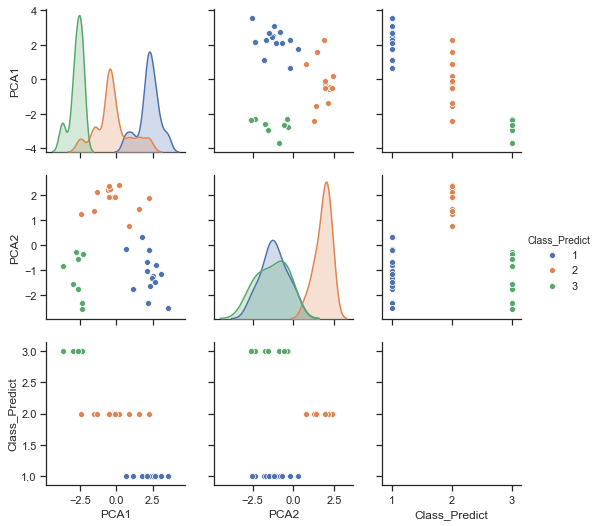

In [33]:
X_Result['Class_Predict'] = pred_elem
sns.pairplot(X_Result, hue="Class_Predict")

<ol>
    <li>MLA = Malic acid</li>
    <li>AOA = Alcalinity of ash</li>
    <li>NFL = Nonflavanoid phenols</li>
    <li>COL = Color intensity</li>
</ol>

No handles with labels found to put in legend.


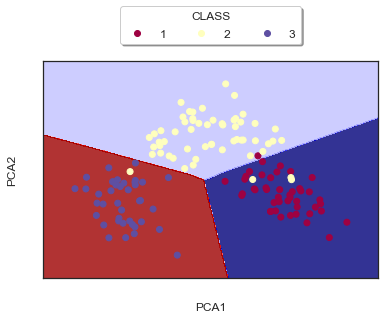

In [34]:
# Code แสดงผลกรณีใช้ PCA
h = .02
x_min, x_max = X_train.iloc[:, 0].min() - 1, X_train.iloc[:, 0].max() + 1
y_min, y_max = X_train.iloc[:, 1].min() - 1, X_train.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

MM = []
for i in range(0,Z.shape[0]):
    MM.append(np.argmax(Z[i]))
MM = np.array(MM)

Z = MM.reshape(xx.shape)
fig, ax = plt.subplots()
plt.contourf(xx, yy, Z, cmap=plt.cm.seismic, alpha=0.8)

# Plot also the training points
scatter = ax.scatter(X_train.iloc[:,0], X_train.iloc[:,1],c=y_train.iloc[0:], cmap=plt.cm.Spectral)
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_xlim(xx.min(), xx.max())
ax.set_ylim(yy.min(), yy.max())
ax.legend(loc='upper left')
legend1 = ax.legend(*scatter.legend_elements(),loc='lower center',ncol=3,fontsize=12, title="CLASS"
                    ,bbox_to_anchor=(0.5, 1.05),fancybox=True, shadow=True)
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
plt.show()